In [1]:
import pandas as pd
df=pd.read_csv('DengueAndClimateBangladesh.csv')
df


,YEAR,MONTH,MIN,MAX,HUMIDITY,RAINFALL,DENGUE
0,2008,1,12.993929,25.059539,78.824885,1.286636,0
1,2008,2,13.658286,26.383448,72.602956,0.687685,0
2,2008,3,20.411250,31.367558,76.903226,0.974194,0
3,2008,4,22.771889,34.031619,73.943810,0.980952,0
4,2008,5,23.945625,34.171060,77.360369,7.021198,0
...,...,...,...,...,...,...,...
129,2018,10,22.646866,31.378430,80.263091,181.225807,2406
130,2018,11,17.928140,29.997776,77.340873,6.500000,1192
131,2018,12,13.580792,26.104022,79.003900,16.225806,293
132,2019,1,12.062041,26.741035,77.990248,0.000000,38


STANDARDIZATION

In [22]:
import sys
print(sys.executable)
print(df.columns.tolist())


c:\Users\User\anaconda3\python.exe
['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE']


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Initialize the model
model = LogisticRegression()

X = df.drop('DENGUE', axis=1)
y = df['DENGUE']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict on test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Show results
print("✅ Model Accuracy:", accuracy)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n🧾 Classification Report:\n", class_report)

✅ Model Accuracy: 0.21951219512195122

📊 Confusion Matrix:
 [[9 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         1
          53       0.00      0.00   

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no 

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df and target column are already defined
X = df.drop('DENGUE', axis=1)
y = df['DENGUE']

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# 2. Scale the data
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

# 3. Convert the scaled arrays to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns)

rounded_summary = np.round(X_train.describe(), 1)
print(rounded_summary)
scaled_summary = np.round(X_train_scaled.describe(), 1)
print(scaled_summary)

         YEAR  MONTH   MIN   MAX  HUMIDITY  RAINFALL
count    93.0   93.0  93.0  93.0      93.0      93.0
mean   2013.3    6.7  20.9  31.0      79.9      21.9
std       3.2    3.5   4.7   2.7       5.6      81.2
min    2008.0    1.0  11.0  23.5      67.5       0.0
25%    2011.0    4.0  17.5  29.6      77.3       0.5
50%    2014.0    7.0  22.8  32.0      80.1       5.7
75%    2016.0   10.0  25.3  32.6      84.8      13.3
max    2019.0   12.0  26.4  35.8      88.4     689.2
       YEAR  MONTH   MIN   MAX  HUMIDITY  RAINFALL
count  93.0   93.0  93.0  93.0      93.0      93.0
mean    0.0   -0.0  -0.0   0.0      -0.0      -0.0
std     1.0    1.0   1.0   1.0       1.0       1.0
min    -1.7   -1.6  -2.1  -2.8      -2.2      -0.3
25%    -0.7   -0.8  -0.7  -0.5      -0.5      -0.3
50%     0.2    0.1   0.4   0.4       0.0      -0.2
75%     0.8    1.0   0.9   0.6       0.9      -0.1
max     1.8    1.5   1.2   1.8       1.5       8.3


C:\Users\User\AppData\Local\Temp\ipykernel_6880\4205198268.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], label=f'{column} (Before Scaling)', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6880\4205198268.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], label=f'{column} (Before Scaling)', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6880\4205198268.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], label=f'{column} (Before Scaling)', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6880\4205198268.py:6: FutureWarning: 

`shade` is now dep

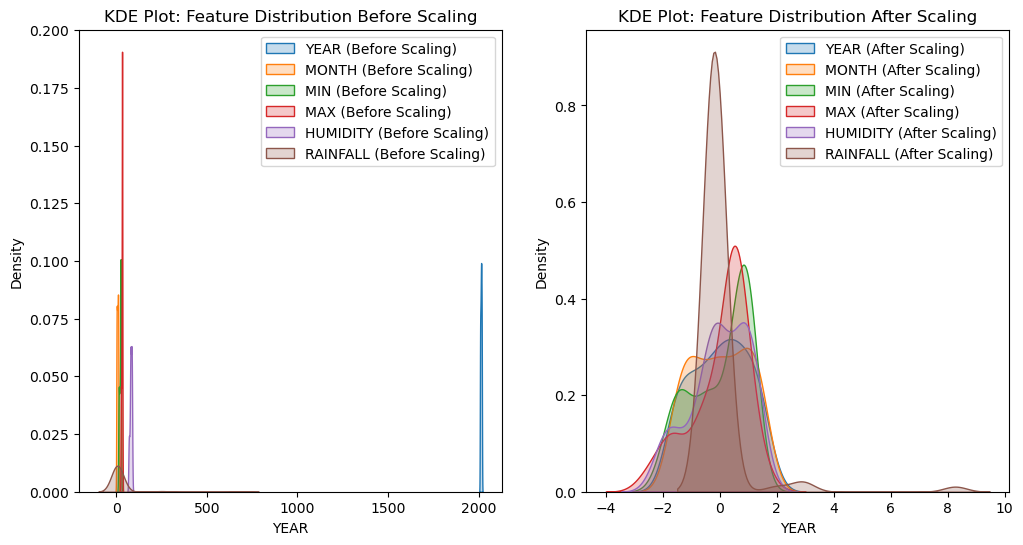

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First subplot for "Before Scaling"
for column in X_train.columns:
    sns.kdeplot(X_train[column], label=f'{column} (Before Scaling)', shade=True)
plt.title("KDE Plot: Feature Distribution Before Scaling")
plt.legend()
plt.subplot(1, 2, 2)  # Second subplot for "After Scaling"
for column in X_train_scaled.columns:
    sns.kdeplot(X_train_scaled[column], label=f'{column} (After Scaling)', shade=True)
plt.title("KDE Plot: Feature Distribution After Scaling")
plt.legend()
plt.show()

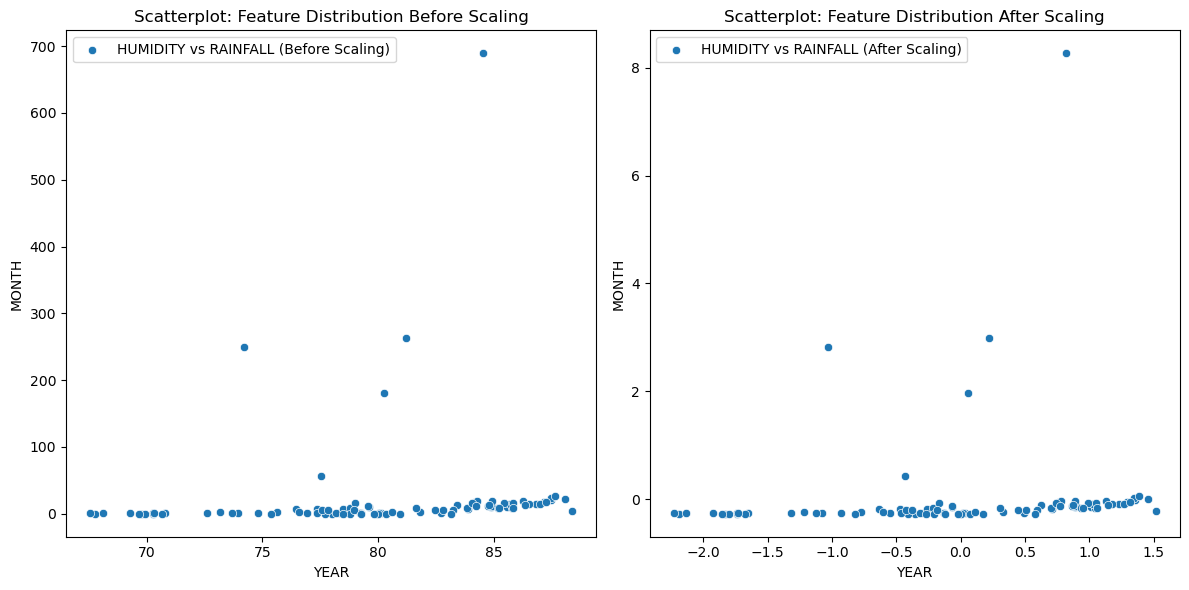

In [42]:
# 4. Plot Scatterplots for feature comparison before and after scaling
plt.figure(figsize=(12, 6))

# Before Scaling: Scatterplot of the first two features (Example: First two columns)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train.iloc[:, 4], y=X_train.iloc[:, 5], label=f'{X_train.columns[4]} vs {X_train.columns[5]} (Before Scaling)')
plt.title("Scatterplot: Feature Distribution Before Scaling")
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.legend()

# After Scaling: Scatterplot of the first two scaled features
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train_scaled.iloc[:, 4], y=X_train_scaled.iloc[:, 5], label=f'{X_train_scaled.columns[4]} vs {X_train_scaled.columns[5]} (After Scaling)')
plt.title("Scatterplot: Feature Distribution After Scaling")
plt.xlabel(X_train_scaled.columns[0])
plt.ylabel(X_train_scaled.columns[1])
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()